In [323]:
%matplotlib inline
import matplotlib as lib
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Notes on gas prices
1. gather data for nominal price of gas standardize on yearly price
2. cleaning and transforming
3. adjust prices for inflation
4. graph the nominal and adjusted prices
5. chosse the other item with historical prices to compare to gas


# Format of our output
The result will be a dictionary with two keys year and price
{'year':[1949,1950,...],'price':[.28,.32.,...]}

In [324]:
t=requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
t.text

'\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\r\n<head>\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge"> \r\n<meta http-equiv="Content-Language" content="en-us" />\r\n<meta name="robots" content="all" />\r\n<meta name="agency" content="EIA - Energy Information Administration" />\r\n<meta name="subject" content="official energy statistics, data, analysis and forecasting" />\r\n<meta name="Description" content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" />\r\n\r\n  \r\n\t   \r\n\t\r\n\t<link rel="stylesheet" href="/global/styles/screen.css" type="text/css" media="screen, projection">\r\n\r\n\t\r\n\t<link type="text/css" href="/global/scripts/jquery/datepicker/jquery-ui

In [325]:
soup=BeautifulSoup(t.text)
soup.prettify()
trtag=soup.find_all('tr')
trtag

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


[<tr><td colspan="13" style="border:1;">Table 5.24  Retail Motor Gasoline and On-Highway Diesel Fuel Prices, 1949-2011<br/>                       (Dollars per Gallon)</td></tr>,
 <tr><td colspan="1" rowspan="3"><br/><br/><br/><br/><br/>Year</td>
 <td colspan="8" rowspan="1">Motor Gasoline by Grade</td>
 <td colspan="3" rowspan="1">Regular Motor Gasoline by Area Type</td>
 <td colspan="1" rowspan="2"><br/><br/>On-Highway<br/>Diesel Fuel </td>
 </tr>,
 <tr>
 <td colspan="2" rowspan="1"><br/>Leaded Regular </td>
 <td colspan="2" rowspan="1"><br/>Unleaded Regular</td>
 <td colspan="2" rowspan="1"><br/>Unleaded Premium</td>
 <td colspan="2" rowspan="1"><br/>All  Grades</td>
 <td colspan="1" rowspan="1">Conventional<br/>Gasoline Areas <sup>1</sup><sup>,2</sup></td>
 <td colspan="1" rowspan="1">Reformulated<br/>Gasoline Areas <sup>3</sup><sup>,4</sup></td>
 <td colspan="1" rowspan="1"><br/>All Areas</td>
 </tr>,
 <tr>
 <td colspan="1" rowspan="1">Nominal <sup>5</sup></td>
 <td colspan="1" row

In [326]:
#testing
trtag[45].contents

['\n', <td colspan="1">1990</td>, '\n', <td colspan="1">
 1.149</td>, '\n', <td colspan="1">
 <sup>R </sup>1.590</td>, '\n', <td colspan="1">
 1.164</td>, '\n', <td colspan="1">
 <sup>R </sup>1.611</td>, '\n', <td colspan="1">
 1.349</td>, '\n', <td colspan="1">
 <sup>R </sup>1.867</td>, '\n', <td colspan="1">
 1.217</td>, '\n', <td colspan="1">
 <sup>R </sup>1.684</td>, '\n', <td colspan="1">
   NA</td>, '\n', <td colspan="1">
   NA</td>, '\n', <td colspan="1">
   NA</td>, '\n', <td colspan="1">
   NA</td>, '\n']

In [327]:
#testing
yandpr=trtag[44].find_all("td")
len(yandpr)
price=yandpr[3].get_text().strip()
if "R" in price:
    print ("yes")
    new =price.replace('R','')
    print (new)

yes
 1.022


In [328]:
#testing
dictOfGasPrice={"year":[],"price":[]}
price=yandpr[3].get_text().strip()
dictOfGasPrice["price"].append(price)
dictOfGasPrice

{'price': ['R 1.022'], 'year': []}

In [329]:
dictOfGasPrice={"year":[],"price":[]}
for i in range (4,67):
    yandpr=trtag[i].find_all("td")
    dictOfGasPrice["year"].append(int(yandpr[0].get_text()))
    if i < 45:
        price=yandpr[1].get_text().strip()
        newprice=price.replace('R','')
        dictOfGasPrice["price"].append(float(newprice))
    else:
        price=yandpr[3].get_text().strip()
        newprice=price.replace('R','')
        dictOfGasPrice["price"].append(float(price))
print(dictOfGasPrice)


{'price': [0.268, 0.268, 0.272, 0.274, 0.287, 0.29, 0.291, 0.299, 0.31, 0.304, 0.305, 0.311, 0.308, 0.306, 0.304, 0.304, 0.312, 0.321, 0.332, 0.337, 0.348, 0.357, 0.364, 0.361, 0.388, 0.532, 0.567, 0.59, 0.622, 0.627, 0.857, 1.191, 1.311, 1.222, 1.158, 1.129, 1.115, 0.857, 0.897, 0.9, 0.997, 1.164, 1.14, 1.127, 1.108, 1.112, 1.147, 1.231, 1.234, 1.059, 1.165, 1.51, 1.461, 1.358, 1.591, 1.88, 2.295, 2.589, 2.801, 3.266, 2.35, 2.788, 3.527], 'year': [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]}


# Dataframe the dictionary and put the dictionary in pandas

In [330]:
df =pd.DataFrame(dictOfGasPrice)
df

,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


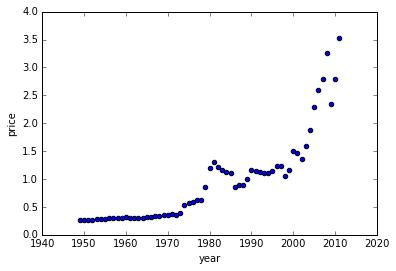

In [331]:
df.plot(x='year',y='price',kind='scatter')
#df.plot?
#control enter to receive more information on using plot

# Note: get CPI data from the website and calculate the appropriate Gas Price

In [332]:
c=requests.get('http://inflationdata.com/Inflation/Consumer_Price_Index/HistoricalCPI.aspx?reloaded=true')
c.text
soup2=BeautifulSoup(c.text)
soup2.prettify()
cpitrtag=soup2.find_all("tr")
cpitrtag

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


[<tr bgcolor="#4B5540">
 <th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Year</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Jan</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Feb</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Mar</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Apr</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">May</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Jun</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Jul</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Aug</font></th><th align="center" bgcolor="Black" scope="col" valign="middle"><font color="White">Sep</font

In [333]:
#testing
cpitrtag[2].contents[14]

<td align="right" nowrap="nowrap"><font color="Black" size="1">237.017</font></td>

In [334]:
#testing
cpitrtag[69].contents[1]

<td align="center" nowrap="nowrap"><font color="Black" size="1">1948</font></td>

In [335]:
#testing
x=cpitrtag[6].find_all("td")
x[13].get_text()

'224.939'

In [336]:
CPI=[]
i=68
while i>=6:
    cpi=cpitrtag[i].find_all("td")
    CPI.append(float(cpi[13].get_text().strip()))
    i+=-1
print(CPI)

[23.8, 24.1, 26.0, 26.5, 26.7, 26.9, 26.8, 27.2, 28.1, 28.9, 29.1, 29.6, 29.9, 30.2, 30.6, 31.0, 31.5, 32.4, 33.4, 34.8, 36.7, 38.8, 40.5, 41.8, 44.4, 49.3, 53.8, 56.9, 60.6, 65.2, 72.6, 82.4, 90.9, 96.5, 99.6, 103.9, 107.6, 109.6, 113.6, 118.3, 124.0, 130.7, 136.2, 140.3, 144.5, 148.2, 152.4, 156.9, 160.5, 163.0, 166.6, 172.2, 177.1, 179.88, 183.96, 188.9, 195.3, 201.6, 207.342, 215.303, 214.537, 218.056, 224.939]


# Calculate the price now:

In [337]:
dictOfGasPrice['exchangeCPI']=[]

In [338]:
dictOfGasPrice['exchangeCPI']=[]
CPInow=CPI[-1]
for i in range(0,len(CPI)):
    CPIthen=CPI[i]
    gasPriceThen=dictOfGasPrice['price'][i]
    gasPriceNow=CPInow*gasPriceThen/CPIthen
#     print(gasPriceThen, CPIthen, CPInow, gasPriceNow)
    dictOfGasPrice['exchangeCPI'].append(gasPriceNow)
x=dictOfGasPrice['exchangeCPI']
y=dictOfGasPrice['year']
z=dictOfGasPrice['price']
for i in range(0,len(x)):
    print('year','   ','price at that year','    ','CPI that year','    ','Price as of year 2011')
    print(y[i],'     ',z[i],'                ',CPI[i],'           ','      ',"{0:.2f}".format(x[i]))


year     price at that year      CPI that year      Price as of year 2011
1949       0.268                  23.8                    2.53
year     price at that year      CPI that year      Price as of year 2011
1950       0.268                  24.1                    2.50
year     price at that year      CPI that year      Price as of year 2011
1951       0.272                  26.0                    2.35
year     price at that year      CPI that year      Price as of year 2011
1952       0.274                  26.5                    2.33
year     price at that year      CPI that year      Price as of year 2011
1953       0.287                  26.7                    2.42
year     price at that year      CPI that year      Price as of year 2011
1954       0.29                  26.9                    2.42
year     price at that year      CPI that year      Price as of year 2011
1955       0.291                  26.8                    2.44
year     price at that year      CPI that 

# Import data from the excel speardsheet

In [339]:
#import pandas
#data = pandas.read_excel(open('CPI.xlsx','rb'))
#data

In [340]:
#year=data.icol(0).real
#year

In [341]:
# cpi=data.icol(1).real
# cpi

In [342]:
#dictOfGasPrice['exchangeCPI']=[]

In [343]:
dictOfGasPrice

{'exchangeCPI': [2.5329265546218487,
  2.501396348547718,
  2.353208,
  2.3257843773584908,
  2.417883632958801,
  2.424992936802974,
  2.442434664179104,
  2.4726750367647057,
  2.481533451957295,
  2.3661403460207615,
  2.357608075601374,
  2.363379358108108,
  2.317097391304348,
  2.2791832450331126,
  2.2346881045751634,
  2.2058534193548387,
  2.227967238095238,
  2.2285623148148153,
  2.2359205988023954,
  2.1782885919540234,
  2.132936566757493,
  2.0696706958762885,
  2.0216739753086417,
  1.942655,
  1.9656831531531531,
  2.427333630831643,
  2.3706396468401487,
  2.332407908611599,
  2.3087798349834983,
  2.1631403834355827,
  2.6552716666666667,
  3.251242099514563,
  3.2441697359735966,
  2.8484503419689116,
  2.615254638554217,
  2.4442361020211743,
  2.330919934944238,
  1.7588752098540146,
  1.7761468573943664,
  1.7112857142857143,
  1.808582120967742,
  2.003282295332823,
  1.8827493392070485,
  1.8068870491803277,
  1.7247917785467128,
  1.687801403508772,
  1.6929464

In [344]:
cpidata = pd.read_excel("cpi_data.xlsx", skiprows=range(9), header=1)
cpidata

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN


In [345]:
cols=list(cpidata)
cols.remove('Year')
cols.remove('HALF1')
cols.remove('HALF2')
cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [346]:
cpidata["Average"]=cpidata[cols].mean(axis=1)
cpidata.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
0,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667
1,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333
2,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333
3,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333
4,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333


In [347]:
#set index year, using data_frame
cpi=cpidata.set_index(keys="Year")
cpi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
Year,,,,,,,,,,,,,,,
1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667
1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333
1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333
1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333
1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333


In [348]:
cpi.ix(1972)

In [351]:
nowcpi=238.78
adj=df.merge(right=cpi,left_on="year", right_index=True)
#use name column, year is the column to merge on and True means the year has been indexing

In [353]:
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333


In [359]:
adj['adj_price']=adj.price*238.78/adj.Average
#actually do things on everyrow of the table, so do not need to do a for loop like usual

In [363]:
adj.tail()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average,adj_price
58,2.801,2007,202.416,203.499,205.352,206.686,207.949,208.352,208.299,207.917,208.490,208.936,210.177,210.036,205.709,208.976,207.342417,3.225692
59,3.266,2008,211.080,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,214.429,216.177,215.302500,3.622139
60,2.350,2009,211.143,212.193,212.709,213.240,213.856,215.693,215.351,215.834,215.969,216.177,216.330,215.949,213.139,215.935,214.537000,2.615553
61,2.788,2010,216.687,216.741,217.631,218.009,218.178,217.965,218.011,218.312,218.439,218.711,218.803,219.179,217.535,218.576,218.055500,3.052978
62,3.527,2011,220.223,221.309,223.467,224.906,225.964,225.722,225.922,226.545,226.889,226.421,226.230,225.672,223.598,226.280,224.939167,3.744021


In [369]:
adj.to_excel("gasPriceData-Jupyter.xlsx")
#export to exel spreadsheet

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7411185e48>], dtype=object)

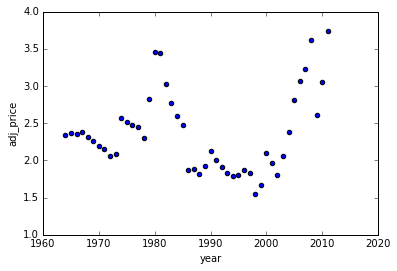

In [362]:
adj.plot(x="year", y="adj_price", kind="scatter", subplots=True)

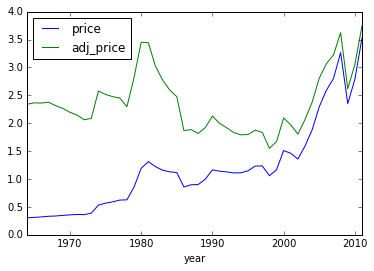

In [367]:
xx=adj[['price','adj_price']]
xx.index=adj.year
xx.plot()

In [ ]:
# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(adj['year'], adj['price'] marker="+", color="b")
# ax.plot(adj[])